## Case Study : Profiling

In [1]:
import pandas as pd 
import numpy as np
import io
import pandas_profiling
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [3]:
# Inspeksi dataframe uncleaned_raw
print('Lima data teratas:')
uncleaned_raw.head()

Lima data teratas:


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08.26,29000,17850,Surabaya
1,536366,WHITE METAL LANTERN,6.0,12/01/10 08.26,41000,17850,Surabaya
2,536367,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08.26,18000,17850,Surabaya
3,536368,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08.26,38000,17850,Jakarta
4,536369,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08.26,27000,17850,Medan


In [4]:
# Check kolom yang mengandung missing values
print('\nKolom dengan missing values :')
print(uncleaned_raw.isnull().any())


Kolom dengan missing values :
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [5]:
# Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()
print('Length dari Quantity :', length_qty)
print('Count dari Quantity :', count_qty)

# Mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty
print('Missing values of Quantity :', number_of_missing_values_qty)

# Mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty/length_qty)
print('Ratio of missing values quantity :', float_of_missing_values_qty)

Length dari Quantity : 505
Count dari Quantity : 485
Missing values of Quantity : 20
Ratio of missing values quantity : 0.039603960396039604


In [6]:
# Mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100)

# Print percentage dari missing values
print('Persentase missing value kolom Quantity :', pct_of_missing_values_qty)

Persentase missing value kolom Quantity : 4.0%


In [7]:
# Mengisis missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

## Case Study : Data Cleansing

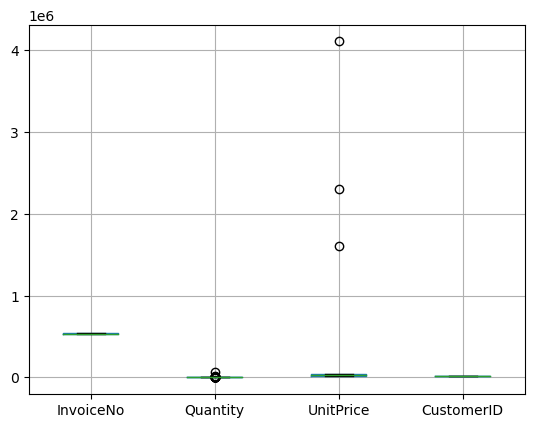

In [8]:
# Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

### Checking Outliers

In [9]:
# Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw['UnitPrice'] < (Q1 - 1.5*IQR)) | (uncleaned_raw['UnitPrice'] > (Q3 + 1.5 * IQR)))]

In [13]:
# Check for duplication
print(uncleaned_raw.duplicated(subset=None))

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 502, dtype: bool


In [14]:
# Remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()